<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/mental_disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/mental_disorders_with_manual_handling.csv -O ds.csv

--2022-04-21 17:41:16--  https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/mental_disorders_with_manual_handling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60331 (59K) [text/plain]
Saving to: ‘ds.csv’

ds.csv              100%[===================>]  58.92K  --.-KB/s    in 0.004s  

2022-04-21 17:41:16 (15.2 MB/s) - ‘ds.csv’ saved [60331/60331]



In [2]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split

from sklearn.preprocessing import StandardScaler


Tensorflow version: 2.8.0


In [3]:
ds = pd.read_csv("/content/ds.csv")
ds.head()

,Нарушения сна,Тревога,Депрессия,Пол,Полных лет,Образование,Род занятий,Семейное положение,Здоровье от 1 до 10,Удовлетворенность семейными отношениями,...,Т. пупок,Т. грудь,Т. бицепс,Т. трицепс,Т.предпл,Т. бедро,Т. икра,ESS,шкала общего клин впечатления,шкала соц функционир
0,да,нет,нет,М,32,высшее,не работает,Холост,7.0,5,...,20.0,10.0,10.0,24.0,6.0,22.0,24.0,3.0,3.0,70.0
1,да,нет,да,М,26,среднее,не работает,Холост,10.0,5,...,10.0,10.0,5.0,12.0,4.0,7.0,12.0,1.0,4.0,60.0
2,нет,нет,нет,М,49,среднее,не работает,Разведен,10.0,5,...,20.0,20.0,32.0,34.0,6.0,50.0,28.0,1.0,3.0,60.0
3,да,нет,нет,М,50,среднее,не работает,Холост,7.0,5,...,30.0,10.0,15.0,20.0,5.0,10.0,10.0,6.0,4.0,60.0
4,да,нет,нет,М,27,среднее,Работает,Разведен,9.0,5,...,10.0,8.0,10.0,18.0,4.0,28.0,8.0,10.0,3.0,70.0


In [4]:
ds.tail()

,Нарушения сна,Тревога,Депрессия,Пол,Полных лет,Образование,Род занятий,Семейное положение,Здоровье от 1 до 10,Удовлетворенность семейными отношениями,...,Т. пупок,Т. грудь,Т. бицепс,Т. трицепс,Т.предпл,Т. бедро,Т. икра,ESS,шкала общего клин впечатления,шкала соц функционир
175,да,нет,нет,Ж,48,Высшее,Не работает,Женат,6.0,5,...,40.0,30.0,15.0,20.0,10.0,25.0,10.0,8.0,3.0,70.0
176,да,нет,да,М,36,Среднее,Не работает,Холост,6.0,3,...,14.0,8.0,4.0,10.0,4.0,14.0,18.0,5.0,6.0,30.0
177,да,да,нет,М,40,Среднее,Не работает,Холост,9.0,5,...,25.0,18.0,12.0,20.0,8.0,30.0,12.0,15.0,6.0,30.0
178,нет,нет,да,М,35,Незаконченное высшее,Не работает,Холост,7.0,2,...,28.0,30.0,30.0,40.0,12.0,50.0,50.0,2.0,4.0,60.0
179,нет,нет,нет,М,24,Высшее,Работает,Холост,10.0,5,...,10.0,20.0,10.0,10.0,10.0,20.0,10.0,7.0,3.0,80.0


In [5]:
# drop unnecessary columns
ds = ds.drop(columns=['О. талии', 'О. бедра', 'О. запястья', 'О. Бедер', 'О. плеча', 'Т. спина', 'Т. пупок', 'Т. грудь', 'Т. бицепс', 'Т. трицепс', 'Т.предпл', 'Т. бедро', 'Т. икра'])
ds = ds.drop(columns=['Здоровье от 1 до 10', 'Удовлетворенность материальным положением', 'Рост', 'Вес', 'BARS (акатизия)', 'SAS (Экстрапир)', 'AIMS (непр дв)', 'ESS', 'шкала общего клин впечатления', 'шкала соц функционир'])

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Нарушения сна                            180 non-null    object
 1   Тревога                                  180 non-null    object
 2   Депрессия                                180 non-null    object
 3   Пол                                      180 non-null    object
 4   Полных лет                               180 non-null    int64 
 5   Образование                              180 non-null    object
 6   Род занятий                              180 non-null    object
 7   Семейное положение                       180 non-null    object
 8   Удовлетворенность семейными отношениями  180 non-null    int64 
 9   Были ли нарушения сна                    180 non-null    object
 10  ИМТ                                      180 non-null    objec

In [7]:
ds = ds.dropna(axis=0)
ds.isna().sum()

Нарушения сна                              0
Тревога                                    0
Депрессия                                  0
Пол                                        0
Полных лет                                 0
Образование                                0
Род занятий                                0
Семейное положение                         0
Удовлетворенность семейными отношениями    0
Были ли нарушения сна                      0
ИМТ                                        0
Динамика веса за год                       0
Операции                                   0
Аллергии                                   0
СД                                         0
Забол кожи                                 0
ГБ                                         0
Панкреатит                                 0
Дисфункция ЖКТ                             0
ЧМТ                                        0
Насл отягощенность                         0
Дебют                                      0
Стаж шизоф

In [8]:
# ds[["Вес", "ИМТ", "Дебют", "Стаж шизофр"]].astype(np.float64)

In [9]:
# "Вес" to float
# ds["Вес"] = ds["Вес"].str.split().apply(lambda x: float(x[0].replace(',', '.')))

In [10]:
ds['ИМТ']

0      24,01234568
1      20,24489796
2      29,75274443
3      22,09317005
4      26,06167931
          ...     
175     26,2226847
176           25,0
177    23,99945917
178    35,18853306
179    19,88385305
Name: ИМТ, Length: 174, dtype: object

In [11]:
# "ИМТ" to float
ds["ИМТ"] = ds["ИМТ"].str.split().apply(lambda x: float(x[0].replace(',', '.')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# "Дебют" to float
ds["Дебют"] = ds["Дебют"].str.split().apply(lambda x: float(x[0].replace(',', '.')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# "Стаж шизофр" to float
ds["Стаж шизофр"] = ds["Стаж шизофр"].str.split().apply(lambda x: float(x[0].replace(',', '.')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 179
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Нарушения сна                            174 non-null    object 
 1   Тревога                                  174 non-null    object 
 2   Депрессия                                174 non-null    object 
 3   Пол                                      174 non-null    object 
 4   Полных лет                               174 non-null    int64  
 5   Образование                              174 non-null    object 
 6   Род занятий                              174 non-null    object 
 7   Семейное положение                       174 non-null    object 
 8   Удовлетворенность семейными отношениями  174 non-null    int64  
 9   Были ли нарушения сна                    174 non-null    object 
 10  ИМТ                                      174 non-n

In [15]:
ds["Нарушения сна"].value_counts()

да     108
нет     66
Name: Нарушения сна, dtype: int64

In [16]:
# Why i did this?
# We have one-hot encoding lol -_-

def change_value_to_numeric(x):
  if type(x) == int or type(x) == float:
    return x

  if x.lower() == "да":
    return 1
  elif x.lower() == "нет":
    return 0
  elif x.lower() == "м":
    return 1
  elif x.lower() == "ж":
    return 0
  
  # Род занятий
  elif x.lower() == "не работает":
    return 0
  elif x.lower() == "работает":
    return 1
  elif x.lower() == "учится":
    return 2
  elif x.lower() == "пенсионер":
    return 3
  
  # Семейное положение:
  elif x.lower() == "холост":
    return 0 
  elif x.lower() == "женат":
    return 1
  elif x.lower() == "разведен":
    return 2
  elif x.lower() == "вдовец":
    return 3

  # Образование:
  elif x.lower() == "среднее":
    return 0 
  elif x.lower() == "незаконченное высшее":
    return 1
  elif x.lower() == "высшее":
    return 2
  elif x.lower() == "неполное среднее":
    return 3
  elif x.lower() == "начальное":
    return 4

  # Динамика веса за год:
  elif x.lower() == "стабильный вес":
    return 0 
  elif x.lower() == "снижение веса":
    return 1
  elif x.lower() == "увеличение веса":
    return 2

  # ЧМТ:
  elif x.lower() == "нет":
    return 0 
  elif x.lower() == "да (без потери сознания)":
    return 1
  elif x.lower() == "да (с потерей сознания)":
    return 2

  # Преобл синдром:
  elif x.lower() == "аффективно-параноидный":
    return 0 
  elif x.lower() == "параноидный":
    return 1
  elif x.lower() == "галлюцинаторно-параноидный":
    return 2
  elif x.lower() == "парафренный":
    return 3
  elif x.lower() == "кататонический":
    return 4

  return "NaN"

In [17]:
ds.applymap(lambda x: change_value_to_numeric(x))

,Нарушения сна,Тревога,Депрессия,Пол,Полных лет,Образование,Род занятий,Семейное положение,Удовлетворенность семейными отношениями,Были ли нарушения сна,...,Панкреатит,Дисфункция ЖКТ,ЧМТ,Насл отягощенность,Дебют,Стаж шизофр,Преобл синдром,P,N,G
0,1,0,0,1,32,2,0,0,5,1,...,0,0,1,0,28.3,3.7,2,11,11,18
1,1,0,1,1,26,0,0,0,5,1,...,0,0,0,0,26.0,2.0,1,10,25,36
2,0,0,0,1,49,0,0,2,5,0,...,0,0,1,0,26.0,23.0,0,9,16,23
3,1,0,0,1,50,0,0,0,5,1,...,0,0,2,0,16.0,34.0,1,13,13,20
4,1,0,0,1,27,0,1,2,5,1,...,0,0,1,0,21.0,6.0,1,7,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,0,0,0,48,2,0,1,5,1,...,0,0,0,0,39.0,9.0,1,2,0,2
176,1,0,1,1,36,0,0,0,3,0,...,0,0,0,0,18.0,18.0,2,32,29,56
177,1,1,0,1,40,0,0,0,5,0,...,0,0,1,0,23.0,17.0,0,25,14,32
178,0,0,1,1,35,1,0,0,2,1,...,0,0,0,0,19.0,16.0,2,19,8,31


In [18]:
ds = ds.applymap(lambda x: change_value_to_numeric(x))

In [19]:
ds.head()

,Нарушения сна,Тревога,Депрессия,Пол,Полных лет,Образование,Род занятий,Семейное положение,Удовлетворенность семейными отношениями,Были ли нарушения сна,...,Панкреатит,Дисфункция ЖКТ,ЧМТ,Насл отягощенность,Дебют,Стаж шизофр,Преобл синдром,P,N,G
0,1,0,0,1,32,2,0,0,5,1,...,0,0,1,0,28.3,3.7,2,11,11,18
1,1,0,1,1,26,0,0,0,5,1,...,0,0,0,0,26.0,2.0,1,10,25,36
2,0,0,0,1,49,0,0,2,5,0,...,0,0,1,0,26.0,23.0,0,9,16,23
3,1,0,0,1,50,0,0,0,5,1,...,0,0,2,0,16.0,34.0,1,13,13,20
4,1,0,0,1,27,0,1,2,5,1,...,0,0,1,0,21.0,6.0,1,7,9,22


In [20]:
# Check for na values
ds.isna().sum()

Нарушения сна                              0
Тревога                                    0
Депрессия                                  0
Пол                                        0
Полных лет                                 0
Образование                                0
Род занятий                                0
Семейное положение                         0
Удовлетворенность семейными отношениями    0
Были ли нарушения сна                      0
ИМТ                                        0
Динамика веса за год                       0
Операции                                   0
Аллергии                                   0
СД                                         0
Забол кожи                                 0
ГБ                                         0
Панкреатит                                 0
Дисфункция ЖКТ                             0
ЧМТ                                        0
Насл отягощенность                         0
Дебют                                      0
Стаж шизоф

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 179
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Нарушения сна                            174 non-null    int64  
 1   Тревога                                  174 non-null    int64  
 2   Депрессия                                174 non-null    int64  
 3   Пол                                      174 non-null    int64  
 4   Полных лет                               174 non-null    int64  
 5   Образование                              174 non-null    int64  
 6   Род занятий                              174 non-null    int64  
 7   Семейное положение                       174 non-null    int64  
 8   Удовлетворенность семейными отношениями  174 non-null    int64  
 9   Были ли нарушения сна                    174 non-null    int64  
 10  ИМТ                                      174 non-n

In [22]:
# turn dataset to float32
ds = ds.astype(np.float32)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 179
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Нарушения сна                            174 non-null    float32
 1   Тревога                                  174 non-null    float32
 2   Депрессия                                174 non-null    float32
 3   Пол                                      174 non-null    float32
 4   Полных лет                               174 non-null    float32
 5   Образование                              174 non-null    float32
 6   Род занятий                              174 non-null    float32
 7   Семейное положение                       174 non-null    float32
 8   Удовлетворенность семейными отношениями  174 non-null    float32
 9   Были ли нарушения сна                    174 non-null    float32
 10  ИМТ                                      174 non-n

In [23]:
ds['Нарушения сна'].value_counts()

1.0    108
0.0     66
Name: Нарушения сна, dtype: int64

In [24]:
ds['Тревога'].value_counts()


0.0    131
1.0     43
Name: Тревога, dtype: int64

In [25]:
ds['Депрессия'].value_counts()

0.0    106
1.0     68
Name: Депрессия, dtype: int64

###  Note to myrself. Стаж шизофр variable greatly reduced prediction accuracy after it was removed

In [26]:
# Let's try to use 'Нарушения сна' as y value
data = ds.drop(columns=['Тревога', 'Депрессия'])

In [27]:
y = data['Нарушения сна']
# X = data.drop(columns=['Нарушения сна'])
# X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [28]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [29]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.003), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history0 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
5/5 [==============================] - 1s 40ms/step - loss: 1.1704 - accuracy: 0.3381 - val_loss: 1.0300 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 1.1648 - accuracy: 0.3381 - val_loss: 1.0261 - val_accuracy: 0.5429 - lr: 1.1220e-04
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 1.1593 - accuracy: 0.3381 - val_loss: 1.0216 - val_accuracy: 0.5429 - lr: 1.2589e-04
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 1.1529 - accuracy: 0.3381 - val_loss: 1.0168 - val_accuracy: 0.5429 - lr: 1.4125e-04
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 1.1454 - accuracy: 0.3381 - val_loss: 1.0116 - val_accuracy: 0.5429 - lr: 1.5849e-04
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 1.1379 - accuracy: 0.3381 - val_loss: 1.0060 - val_accuracy: 0.5429 - lr: 1.7783e-04
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss

In [31]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


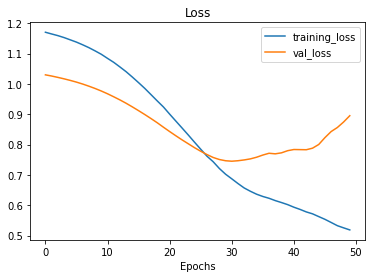

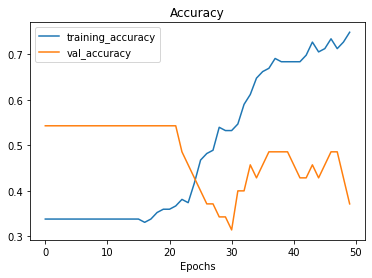

In [32]:
plot_loss_curves(history0)

### Find bels LR

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history_lr = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/100
5/5 [==============================] - 1s 54ms/step - loss: 1.1704 - accuracy: 0.3381 - val_loss: 1.0300 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 1.1648 - accuracy: 0.3381 - val_loss: 1.0261 - val_accuracy: 0.5429 - lr: 1.1220e-04
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 1.1593 - accuracy: 0.3381 - val_loss: 1.0216 - val_accuracy: 0.5429 - lr: 1.2589e-04
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 1.1529 - accuracy: 0.3381 - val_loss: 1.0168 - val_accuracy: 0.5429 - lr: 1.4125e-04
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 1.1454 - accuracy: 0.3381 - val_loss: 1.0116 - val_accuracy: 0.5429 - lr: 1.5849e-04
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 1.1379 - accuracy: 0.3381 - val_loss: 1.0060 - val_accuracy: 0.5429 - lr: 1.7783e-04
Epoch 7/100
5/5 [==============================] - 0s 11ms/st

Text(0.5, 1.0, 'Learning rate vs. loss')

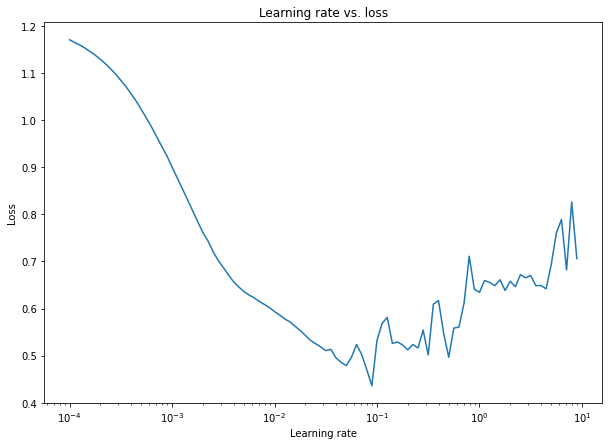

In [34]:
import matplotlib.pyplot as plt

# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"]) # lrs - x-axis, history - y-axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [47]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history1 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
5/5 [==============================] - 1s 48ms/step - loss: 0.9304 - accuracy: 0.3813 - val_loss: 0.7364 - val_accuracy: 0.4571
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6631 - accuracy: 0.6403 - val_loss: 0.7721 - val_accuracy: 0.4571
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6626 - accuracy: 0.6403 - val_loss: 0.7659 - val_accuracy: 0.4571
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.6497 - accuracy: 0.6403 - val_loss: 0.7570 - val_accuracy: 0.4571
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6371 - accuracy: 0.6403 - val_loss: 0.7386 - val_accuracy: 0.4857
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6296 - accuracy: 0.6547 - val_loss: 0.7399 - val_accuracy: 0.4857
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6180 - accuracy: 0.6691 - val_loss: 0.7402 - val_accuracy: 0.4857
Epoch 8/50
5/5 [=============

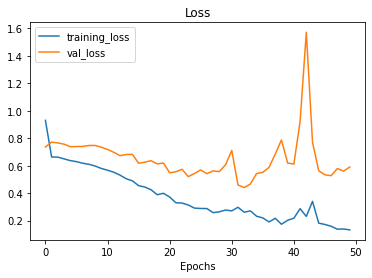

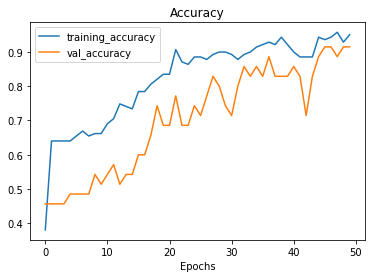

In [48]:
plot_loss_curves(history1)

looks like good results. Save it

In [37]:
train_data = data[:121] # 70%
validation_data = data[121:155] # 20%
test_data = data[155:174] # 10%

In [38]:
y_train = train_data['Нарушения сна']
y_validation = validation_data['Нарушения сна']
y_test = test_data['Нарушения сна']

X_train = train_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_validation = validation_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_test = test_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]

In [39]:
len(y_train), len(y_validation), len(y_test)

(121, 34, 19)

In [40]:
# y = data['Нарушения сна']
# # X = data.drop(columns=['Нарушения сна'])
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [41]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [42]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_validation_scaled, y_validation))

Epoch 1/50
4/4 [==============================] - 1s 43ms/step - loss: 0.6809 - accuracy: 0.6033 - val_loss: 0.6716 - val_accuracy: 0.6765
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6521 - accuracy: 0.6116 - val_loss: 0.6652 - val_accuracy: 0.6471
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6316 - accuracy: 0.6612 - val_loss: 0.6622 - val_accuracy: 0.6765
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6147 - accuracy: 0.6860 - val_loss: 0.6633 - val_accuracy: 0.6765
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5985 - accuracy: 0.6942 - val_loss: 0.6685 - val_accuracy: 0.7353
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5809 - accuracy: 0.7107 - val_loss: 0.6745 - val_accuracy: 0.6765
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5638 - accuracy: 0.7273 - val_loss: 0.6753 - val_accuracy: 0.6765
Epoch 8/50
4/4 [================

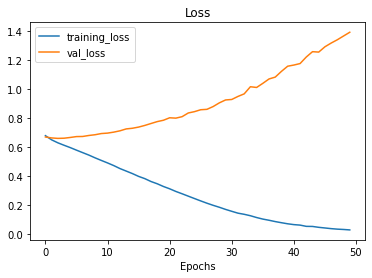

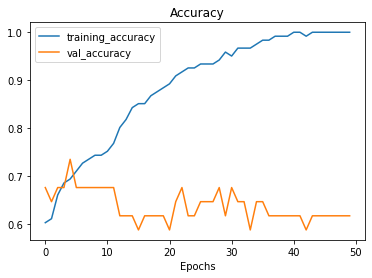

In [43]:
plot_loss_curves(history)

### It is very likely that the model has overfitted. It is necessary to add data augmentation, validation data, visualization
Find best lr

Вывести наиболее значимые характеристики



Check result on different scalers. For example:

1) Min Max Scaler (try it)

2) Standard Scaler

3) Max Abs Scaler

4) Robust Scaler

5) Quantile Transformer Scaler

6) Power Transformer Scaler

7) Unit Vector Scaler



In [44]:
# Let's try to use 'Нарушения сна' as y value
data = ds.drop(columns=['Тревога', 'Депрессия'])
y = data['Нарушения сна']
# X = data.drop(columns=['Нарушения сна'])
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']] # 'Были ли нарушения сна', 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Scale X from 0 to 1
scaler2 = StandardScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [45]:
X_train_scaled

array([[ 0.6918984 ,  0.8722883 ,  1.3401407 , ..., -0.5061745 ,
        -0.38204715, -0.22233704],
       [ 0.6918984 ,  0.8722883 , -1.1435868 , ..., -0.35486642,
         2.2368073 ,  0.5268714 ],
       [-1.4452989 , -1.0833257 , -1.1435868 , ...,  0.25036588,
         0.4909044 , -0.03503493],
       ...,
       [ 0.6918984 ,  0.22041692,  1.3401407 , ...,  0.8555982 ,
        -0.5275391 , -0.12868598],
       [ 0.6918984 ,  0.22041692,  0.09827699, ...,  0.0990578 ,
         0.05442863, -0.22233704],
       [ 0.6918984 ,  0.8722883 , -1.1435868 , ..., -0.20355834,
        -0.09106328, -0.3159881 ]], dtype=float32)

In [46]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history2 = model2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6331
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6403
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6403
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6403
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.6763
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6906
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.6978
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.6978
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7194
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7338
Epoch 11/50
5/5 [======================